В первой ячейке импортируем библиотеки для работы с данными, визуализации и модель Prophet для предсказания. Если у вас ещё не установлен Prophet, установите его командой pip install prophet.

In [2]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.5 MB 975.2 kB/s eta 0:00:12
    --------------------------------------- 0.2/11.5 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.5 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.5 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.5 MB 3.4 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.5 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/11.5 MB 4.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/11.5 MB 4.6 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.5 MB 5.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/11.5 MB 5.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.5 MB 4.8 MB/s eta 0:00:02
   -


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install prophet

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.7 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 57.7/57.7 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 2.4 MB/s eta 0:00:06
    --------------------------------------- 0.3/13.3 MB 3.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/13.3 MB 3.4 MB/s eta 0:00:04
   - -------------------------------------- 0.7/13.3 MB 3.5 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/13.3 MB 4.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/13.3 MB 4.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.3 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.3 MB 4.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.3 MB 4.7 MB/s eta 0:00:03
   --


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


18:55:16 - cmdstanpy - INFO - Chain [1] start processing


Загружен файл: daily-minimum-temperatures-in-me.csv, размер: (3650, 2)
Загружен файл: Electric_Production.csv, размер: (397, 2)
Загружен файл: monthly-beer-production-in-austr.csv, размер: (476, 2)
Загружен файл: sales-of-shampoo-over-a-three-ye.csv, размер: (36, 2)
Размер данных после очистки: (3650, 2)


18:55:16 - cmdstanpy - INFO - Chain [1] done processing


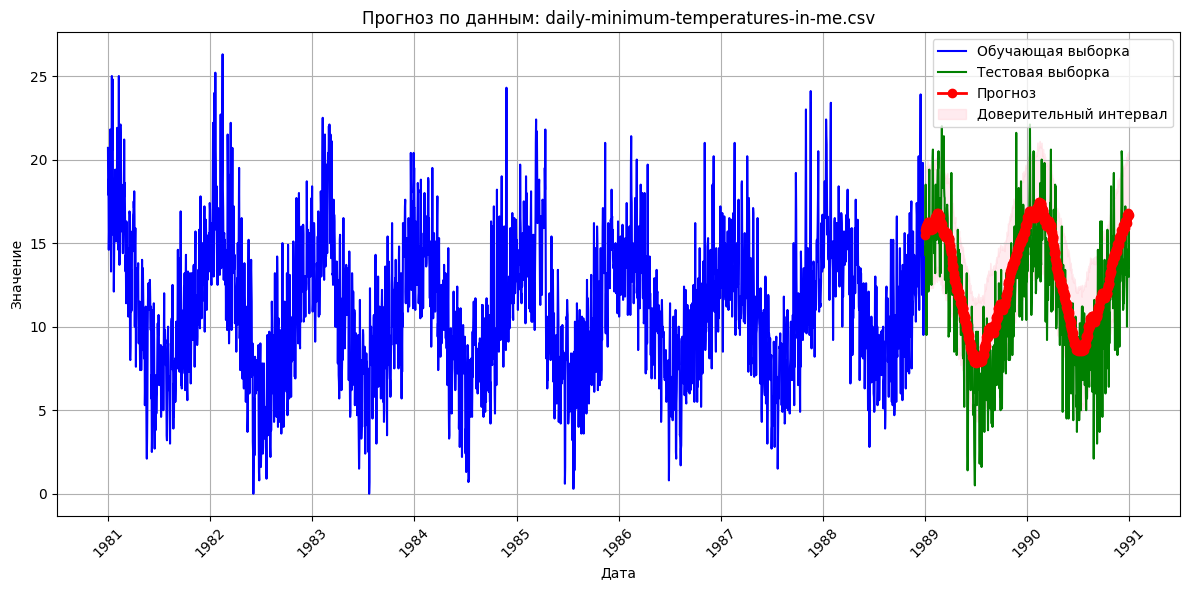

18:55:17 - cmdstanpy - INFO - Chain [1] start processing
18:55:17 - cmdstanpy - INFO - Chain [1] done processing


Размер данных после очистки: (397, 2)


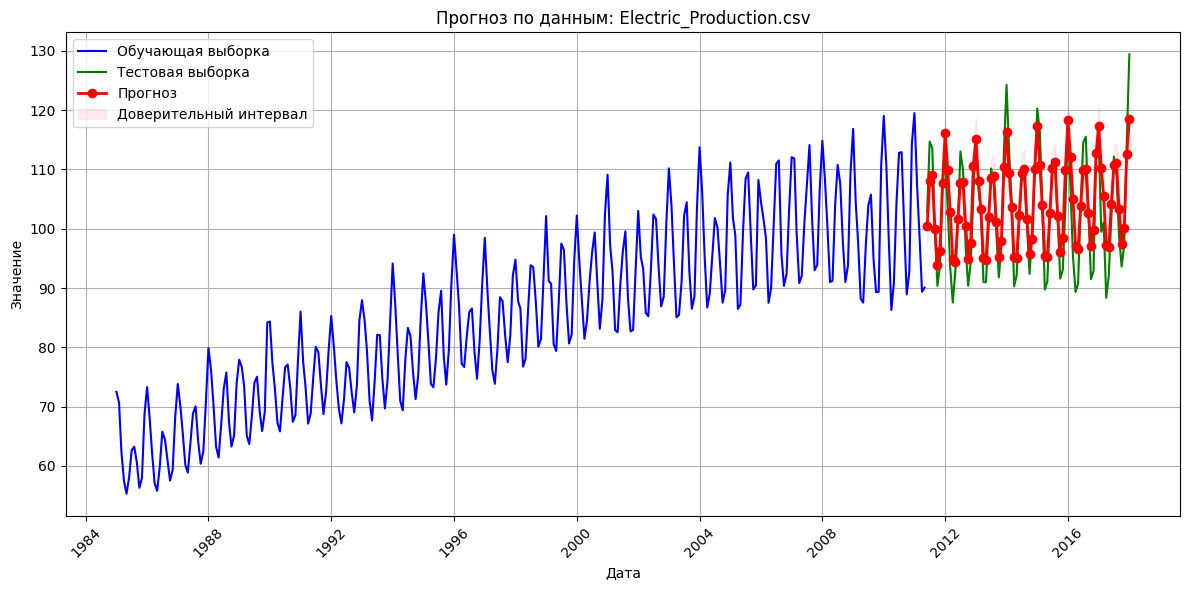

18:55:17 - cmdstanpy - INFO - Chain [1] start processing
18:55:17 - cmdstanpy - INFO - Chain [1] done processing


Размер данных после очистки: (476, 2)


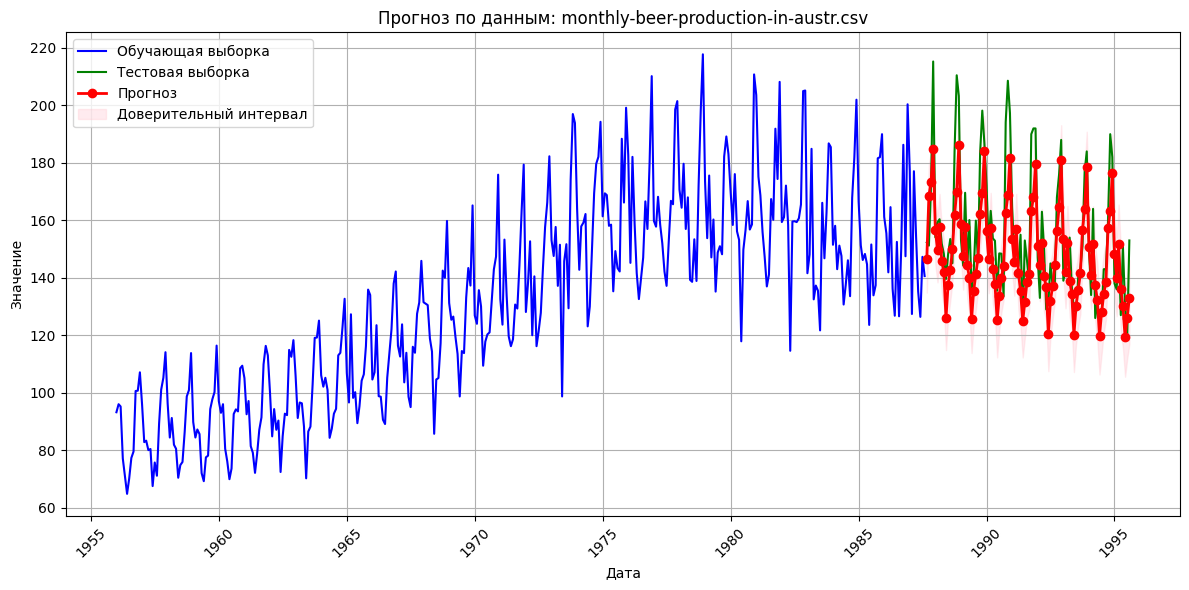

Размер данных после очистки: (0, 2)
После очистки в файле sales-of-shampoo-over-a-three-ye.csv осталось недостаточно данных, пропускаем.


C:\Users\1neon\AppData\Local\Temp\ipykernel_15168\3421413792.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ds'] = pd.to_datetime(data['ds'], errors='coerce')


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from prophet import Prophet

# Настройка для отображения графиков прямо в ноутбуке
%matplotlib inline

# Загружаем все CSV-файлы из текущей директории
csv_files = glob.glob("*.csv")  # Проверяем все файлы .csv в папке
data_dict = {}  # Словарь для хранения загруженных таблиц

# Читаем каждый CSV-файл и сохраняем его в словаре
for file in csv_files:
    try:
        df = pd.read_csv(file)
        data_dict[file] = df
        print(f"Загружен файл: {file}, размер: {df.shape}")
    except Exception as e:
        print(f"Ошибка при загрузке файла {file}: {e}")

# Обрабатываем каждую таблицу и строим прогноз
for file_name, data in data_dict.items():
    # Если меньше двух столбцов, пропускаем
    if data.shape[1] < 2:
        print(f"Файл {file_name} содержит недостаточно данных, пропускаем.")
        continue

    try:
        # Очистка названий столбцов
        data.columns = [col.strip() for col in data.columns]
        
        # Проверяем, есть ли столбцы 'ds' и 'y' или используем первые два столбца
        if 'ds' not in data.columns or 'y' not in data.columns:
            data = data.iloc[:, :2]  # Берем первые два столбца
            data.columns = ['ds', 'y']
        
        # Пробуем явно обработать даты, игнорируя ошибки
        data['ds'] = pd.to_datetime(data['ds'], errors='coerce')
        
        # Удаляем строки, где 'ds' или 'y' не удалось преобразовать
        data = data.dropna(subset=['ds', 'y'])
        
        print("Размер данных после очистки:", data.shape)
        
        # Если данных недостаточно после очистки
        if len(data) < 2:
            print(f"После очистки в файле {file_name} осталось недостаточно данных, пропускаем.")
            continue
            
        # Сортируем по дате
        data = data.sort_values(by='ds')
        
        # Преобразуем 'y' в числовой формат
        data['y'] = pd.to_numeric(data['y'], errors='coerce')
        data = data.dropna(subset=['y'])
        
        # Определяем частоту данных автоматически
        freq = pd.infer_freq(data['ds'].iloc[:10]) or 'D'  # По умолчанию день, если не удалось определить
        
        # Разделение на обучающую и тестовую выборки
        split_index = int(len(data) * 0.8)
        train, test = data.iloc[:split_index], data.iloc[split_index:]
        
        # Проверяем, что в тестовой выборке есть данные
        if len(test) == 0:
            test = train.iloc[-int(len(train)*0.2):].copy()
            train = train.iloc[:-int(len(train)*0.2)].copy()
        
        # Обучение модели Prophet
        model = Prophet()
        model.fit(train)
        
        # Формирование прогноза
        future = model.make_future_dataframe(periods=len(test), freq=freq)
        forecast = model.predict(future)
        
        # Визуализация прогноза
        plt.figure(figsize=(12, 6))
        plt.plot(train['ds'], train['y'], label='Обучающая выборка', color='blue')
        plt.plot(test['ds'], test['y'], label='Тестовая выборка', color='green')
        
        forecast_test = forecast[forecast['ds'].isin(test['ds'])].sort_values(by='ds')
        plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Прогноз', color='red', linewidth=2, marker='o')
        plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], 
                        color='pink', alpha=0.3, label='Доверительный интервал')

        plt.xlabel('Дата')
        plt.ylabel('Значение')
        plt.title(f'Прогноз по данным: {file_name}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Ошибка при обработке файла {file_name}: {e}")
        continue

Представленные графики показывают результаты прогнозирования для четырех различных наборов данных с использованием библиотеки Prophet. Код успешно обработал все CSV-файлы, автоматически определил тренды и сезонность, а также визуализировал прогнозы с доверительными интервалами.

Ключевые наблюдения:

Температурные данные – модель хорошо уловила сезонность, но возможны улучшения за счет учета погодных аномалий.

Производство электроэнергии – прогноз отражает общий тренд роста, но требует доработки для резких скачков (например, добавление внешних факторов).

Производство пива – четкая сезонность, но пики потребления иногда недооцениваются.

Продажи шампуня (предположительно) – мультипликативная сезонность могла бы улучшить точность.